## Flow around airfoil

**Adding gfdm library path**

In [1]:
import sys
sys.path.insert(0, "Add gfdm library path here")

**Import libraries**

In [2]:
import numpy as np                   # numpy module

from matplotlib import pyplot as plt # Pyplot module
plt.rc('font', size=5)               # Change General Font Size

# gfdm libraries
from incompressibleFlow2d import Preprocessor  # Pre-Processor
from incompressibleFlow2d import Postprocessor # Post-Processor
from gfdm2d import Mesh                        # Mesh Object

**Define simulation and material parameters**

In [3]:
# Simulation parameters
frequency           = 100 # frequency of the simulation [1/s]
timeEnd             = 10  # End time of the simulation [s]
numThreads          = 6   # num of threads used to run the simulation (should not be higher than the maximum number of cpu cores)

# Material parameters
# parameters taken for air at around 20°C
# source: https://www.engineersedge.com/physics/viscosity_of_air_dynamic_and_kinematic_14483.htm
dynViscosity = 1.8*10**(-5) # dynamic viscosity [kg/(ms)] 
massDensity  = 1.2          # mass density  [kg/m³]

**Initialise Preprocessor**

In [4]:
prepro  = Preprocessor("airfoil") # Initialise preprocessor

prepro.setFrequency(frequency)       # set the simulation frequency
prepro.setTimeEnd(timeEnd)           # set the end-time of the simulation
prepro.setNumThreads(numThreads)     # set the number of threads
prepro.setMassDensity(massDensity)   # set up mass density
prepro.setDynViscosity(dynViscosity) # set up dynamic viscosity
#prepro.setSolverTolerance(1e-12)    # set up tolerance for iterative solver (if required)

**Import and link mesh**
<br> geo-file for the airflow geometry taken from
<br> https://people.sc.fsu.edu/~jburkardt/examples/gmsh/gmsh.html

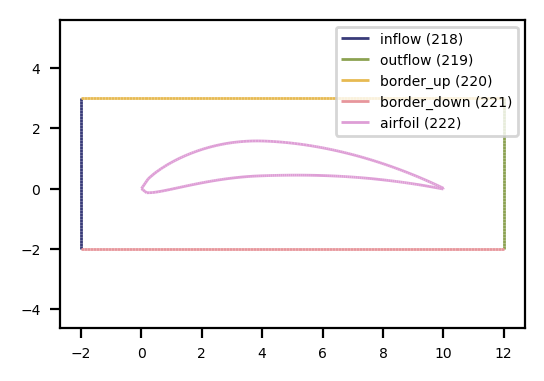

In [5]:
mesh = Mesh('airfoil_10234.msh') # Load mesh with 10234 nodes (The Animation on the Github page was made with a mesh which has 200000 nodes)
prepro.linkMesh(mesh)            # Link mesh to to the preprocessor object

# Plot the boundaries
fig, ax = plt.subplots()
fig.dpi = 200
fig.set_figheight(2)
fig.set_figwidth(3)
#mesh.plotMesh(ax, lw=0.3)  # plot the mesh 
mesh.plotBoundary(ax, lw=1) # plot the boundaries
plt.legend()

**Set boundary conditions**

In [6]:
U = 10 # Inflow velocity [m/s]
prepro.setBoundaryCondition(physicalTag=218, boundaryType='velocity', values=[U,0]) # Inflow boundary condition on the left side
prepro.setBoundaryCondition(physicalTag=219, boundaryType='outflow')                # Outflow boundary condition on the right side
prepro.setBoundaryCondition(physicalTag=220, boundaryType='slip')                   # Slip boundary condition upper side
prepro.setBoundaryCondition(physicalTag=221, boundaryType='slip')                   # Slip boundary condition down side
prepro.setBoundaryCondition(physicalTag=222, boundaryType='velocity', values=[0,0]) # No-slip boundary condition at the airfoil

**Set initial confition**

In [7]:
prepro.setInitialCondition(v0=[0,0]) # The velocity at the beginning should be 0

**Run solver**

In [8]:
solverPath = "FOLDER WITH SOLVERS/incompressibleFlow2d_BiCGSTAB"
prepro.setSolver(solverPath) # Set the solver path 
prepro.runSolver()           #  Run the simulation 

Solver Running...
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
100%
Time needed: 217.7123875617981 seconds


**Postprocessing**

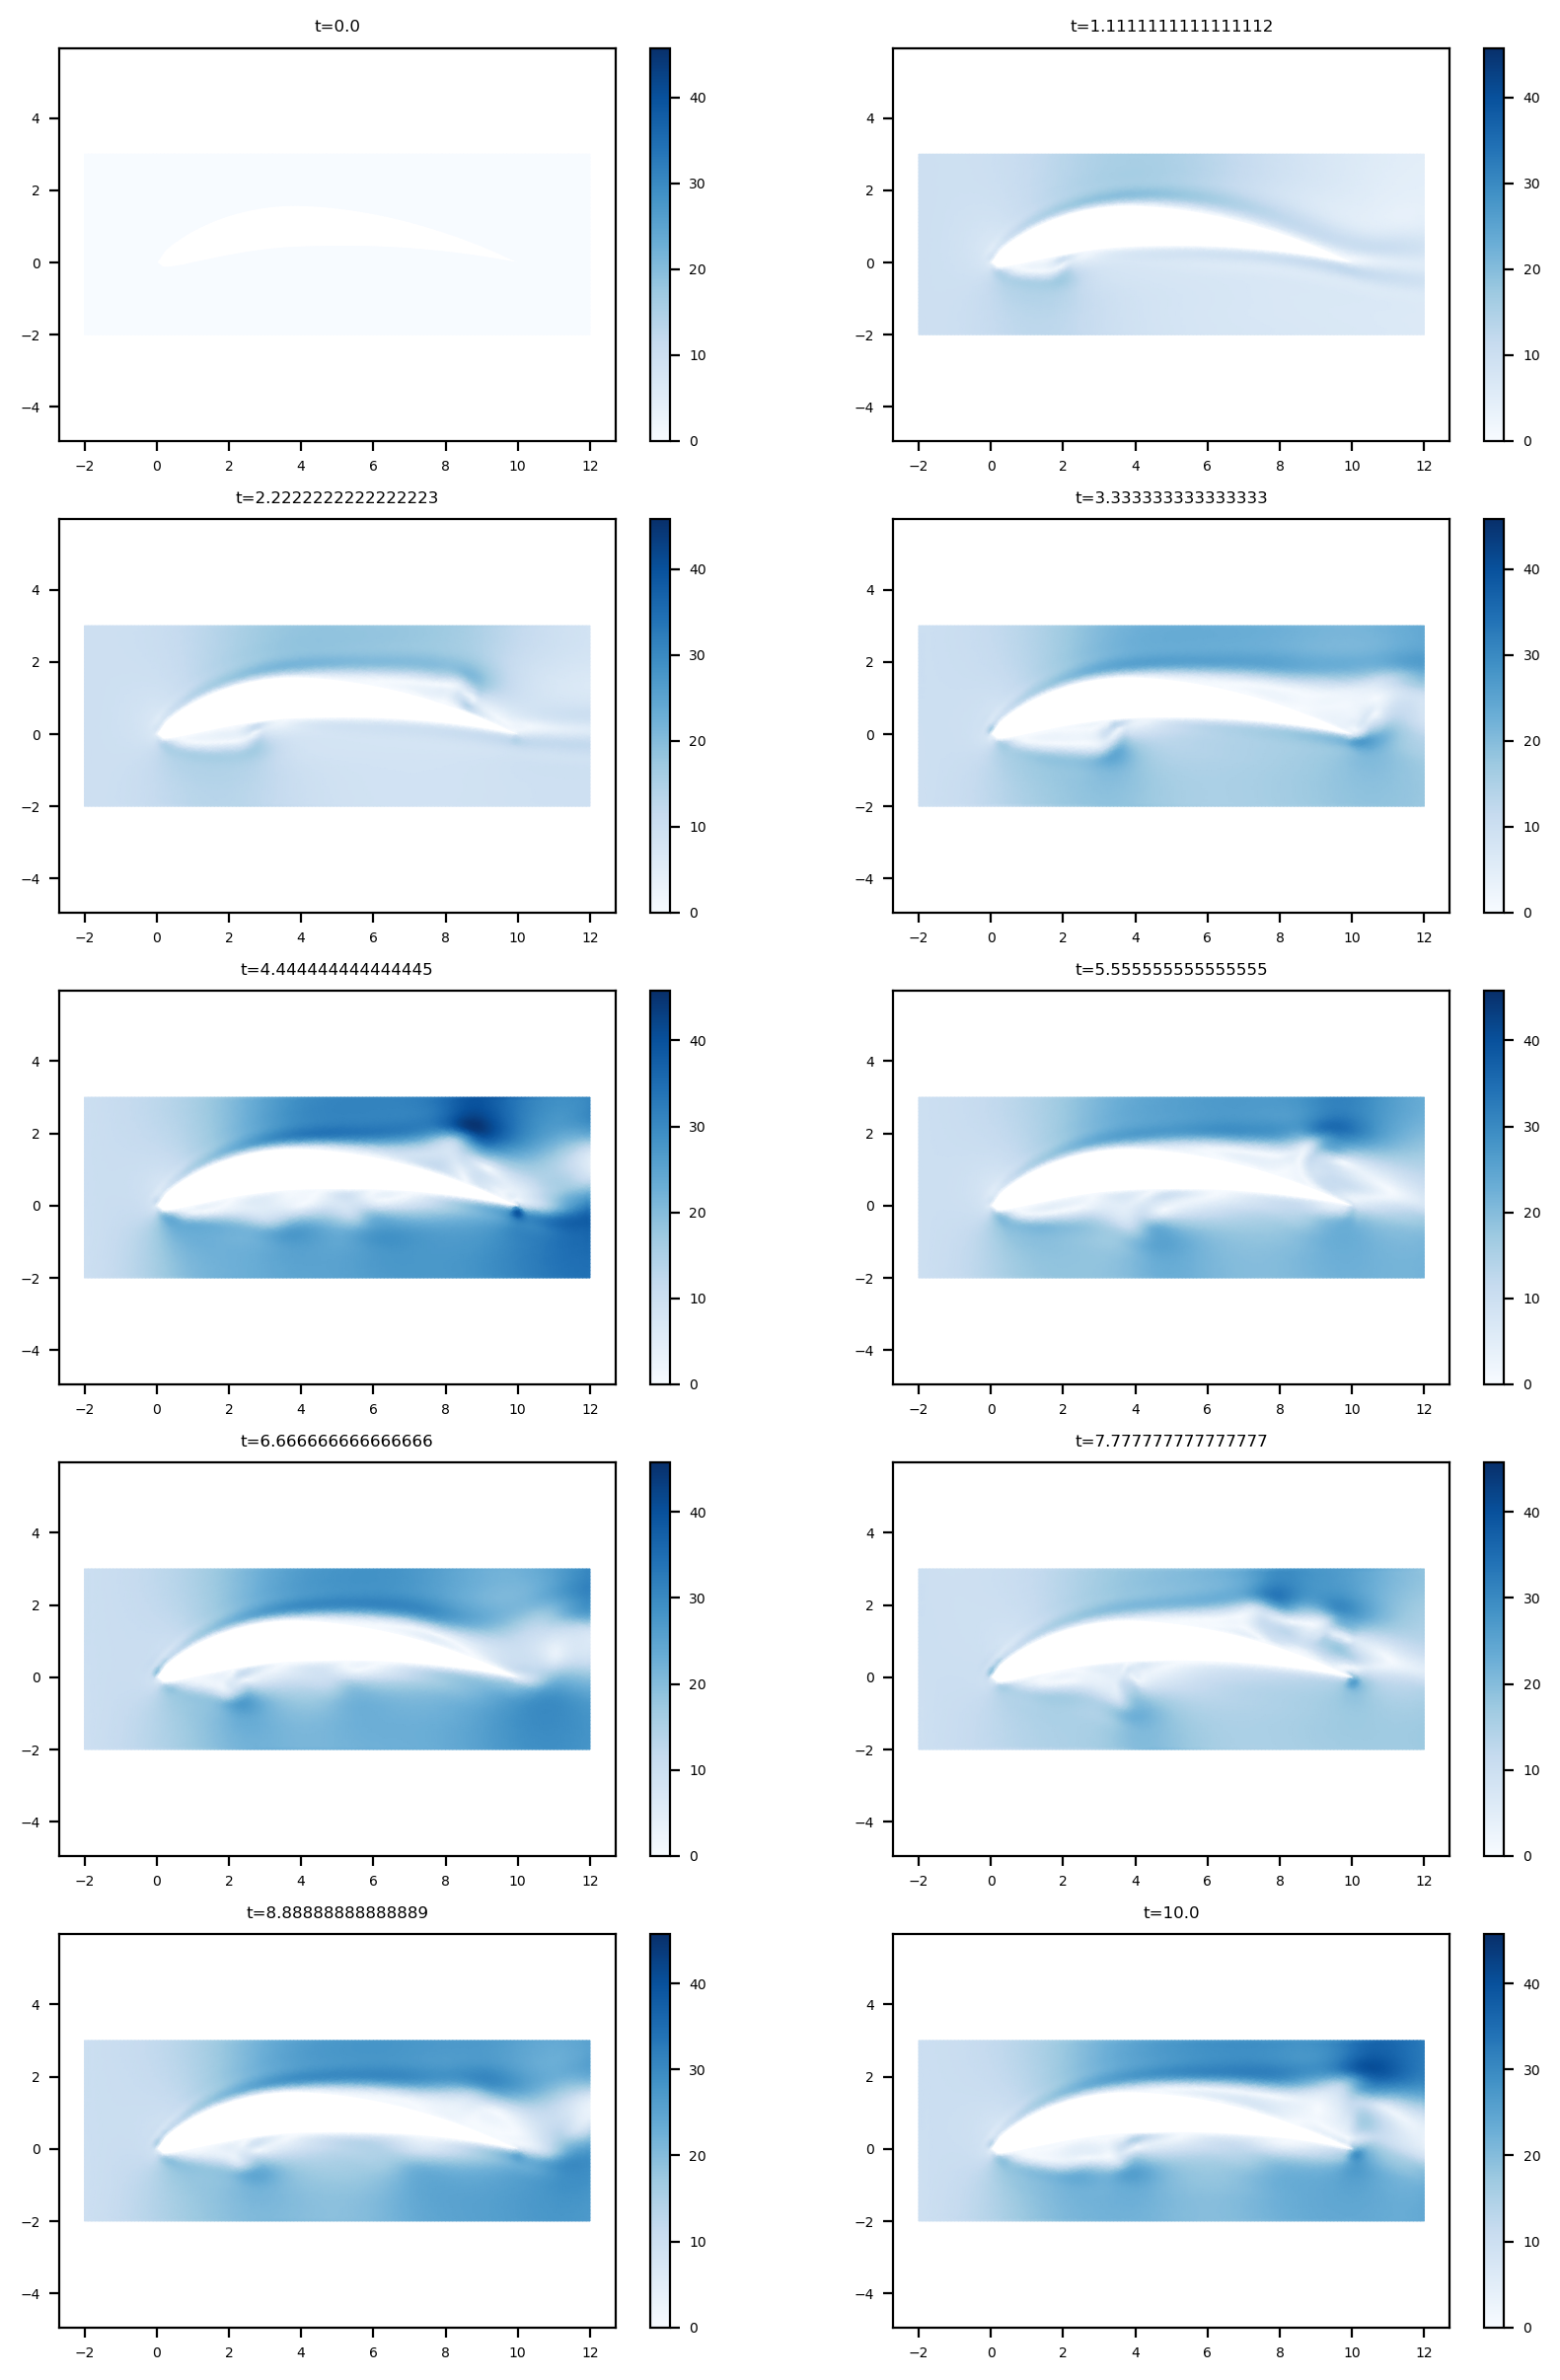

In [9]:
postpr = Postprocessor("airfoil") # Initialise postprocessor
postpr.linkMesh(mesh) # link mesh

# plot results
fig, ax = plt.subplots(nrows=5,ncols=2,figsize=(10,15), dpi=200)
scale = np.linspace(0,1,10) 
postpr.plotResults(fig=fig,
                   ax=ax,
                   var='|vel|',         # Magnitude of the velocity should be plotted
                   tVal= scale*timeEnd, # The velocity field at 10 different time-points between 0-tEnd should be plotted 
                   colormap='Blues')    # see https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [11]:
#create animation of the simulation results
'''
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,3), dpi=200)
postpr.triangulationPlotAnimated(fig = fig,
                                 ax = ax,
                                 var = '|vel|',               # Magnitude of the velocity should be animated
                                 name = "flow_along_airfoil", # name of the .mp4 output file
                                 colormap = "Blues")          # see https://matplotlib.org/stable/users/explain/colors/colormaps.html
'''